In [139]:
import pandas as pd
import numpy as np

train = pd.read_csv("C:\\Users\\panda\\Documents\\machine_learning\\train.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
from sklearn.model_selection import train_test_split
target = train.iloc[:,0]
data = train.iloc[:,1:]

x_train, x_val, y_train, y_val = train_test_split(data, target, test_size = 0.2, stratify=target)

In [143]:
x_train.info

<bound method DataFrame.info of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
20758       0       0       0       0       0       0       0       0       0   
16285       0       0       0       0       0       0       0       0       0   
341         0       0       0       0       0       0       0       0       0   
40690       0       0       0       0       0       0       0       0       0   
24416       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
9978        0       0       0       0       0       0       0       0       0   
5313        0       0       0       0       0       0       0       0       0   
27233       0       0       0       0       0       0       0       0       0   
10958       0       0       0       0       0       0       0       0       0   
12567       0       0       0       0       0       0       0       0       0

In [145]:
y_train

20758    7
16285    5
341      2
40690    1
24416    1
        ..
9978     0
5313     1
27233    8
10958    7
12567    8
Name: label, Length: 33600, dtype: int64

In [147]:
x_val.info

<bound method DataFrame.info of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
36201       0       0       0       0       0       0       0       0       0   
39344       0       0       0       0       0       0       0       0       0   
19169       0       0       0       0       0       0       0       0       0   
28499       0       0       0       0       0       0       0       0       0   
2688        0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19564       0       0       0       0       0       0       0       0       0   
31334       0       0       0       0       0       0       0       0       0   
4823        0       0       0       0       0       0       0       0       0   
14946       0       0       0       0       0       0       0       0       0   
24458       0       0       0       0       0       0       0       0       0

In [149]:
y_val.info

<bound method Series.info of 36201    5
39344    5
19169    8
28499    2
2688     3
        ..
19564    6
31334    6
4823     9
14946    3
24458    4
Name: label, Length: 8400, dtype: int64>

In [39]:
x_train = x_train.values
y_train = y_train.values
x_val = x_val.values
y_val = y_val.values

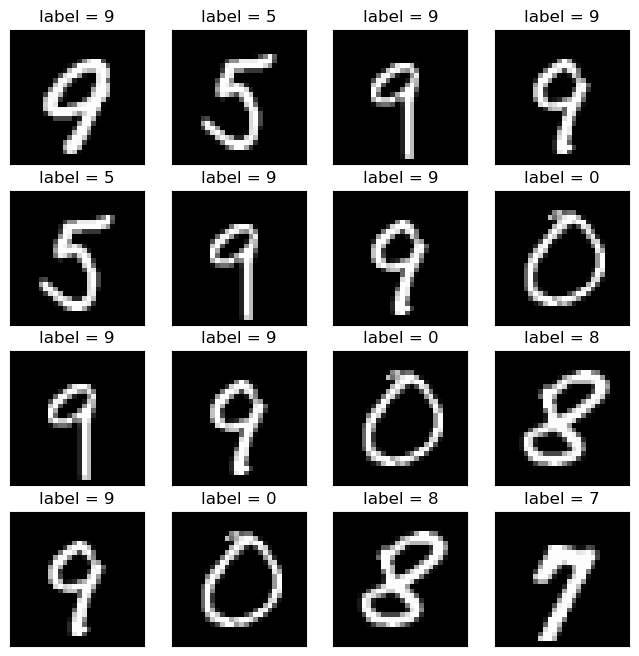

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,4, figsize = (8,8))
for i in range(4):
    for j in range(4):
        ax[i , j].imshow(x_train[i*4 + j*4].reshape(28,28), cmap='gray')
        ax[i , j].set_title('label = %s' %(y_train[i*4 + j*4]))
        ax[i , j].set_xticks([])
        ax[i , j].set_yticks([])

In [47]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, l1_ratio = None,
                        max_iter = 100, multi_class = 'multinomial', n_jobs = None, penalty = 'l2',random_state = None, solver = 'lbfgs',
                        tol = 0.001, verbose = 0, warm_start = False)
clf.fit(x_train, y_train)

C:\Users\panda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

In [49]:
from sklearn.metrics import accuracy_score
y_val_pred = clf.predict(x_val)
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.911


In [61]:
y_val_pred

array([3, 8, 6, ..., 0, 9, 7], dtype=int64)

In [63]:
x_val_correct = x_val[y_val_pred == y_val,:] # 1.실제 결과와 예측결과가 같은 x_val 값을 찾기
y_val_correct = y_val[y_val == y_val_pred] # 2.실제 결과와 예측결과가 같은 y_val 값 찾기 원래 값 
y_val_pred_correct = y_val_pred[y_val == y_val_pred] # 3.실제결과와 예측결과가 같은 y_val_predict값 모델이 예측한 값

In [97]:
x_val_correct[0].shape

(784,)

In [107]:
y_val_pred_correct

array([3, 8, 6, ..., 0, 9, 7], dtype=int64)

Corretly predicted images


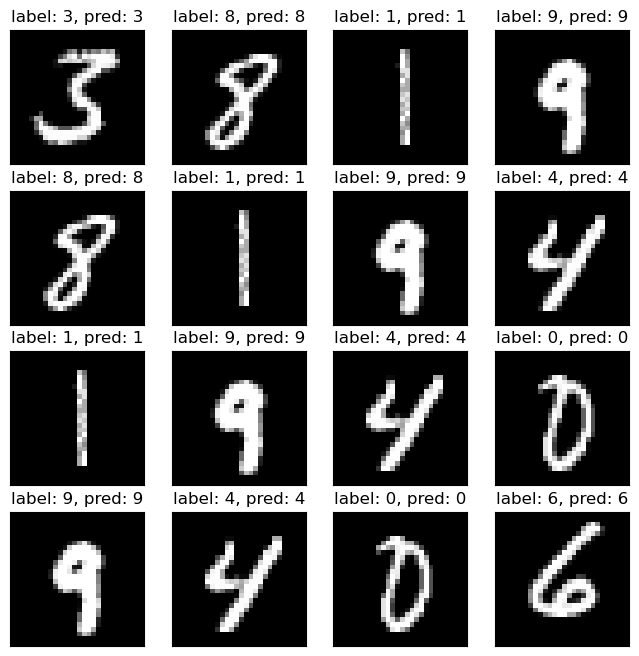

In [111]:
print("Corretly predicted images")
fig, ax = plt.subplots(4,4, figsize = (8,8))
for i in range(4):
    for j in range(4):
        ax[i , j].imshow(x_val_correct[i*4 + j*4].reshape(28,28), cmap='gray')
        ax[i , j].set_title('label: %s, pred: %s' %(y_val_correct[i*4 + j*4], y_val_pred_correct[i*4 + j*4]))
        ax[i , j].set_xticks([])
        ax[i , j].set_yticks([])

In [113]:
x_val_incorrect = x_val[y_val != y_val_pred,:]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

In [117]:
x_val_incorrect.shape

(747, 784)

Incorretly predicted images


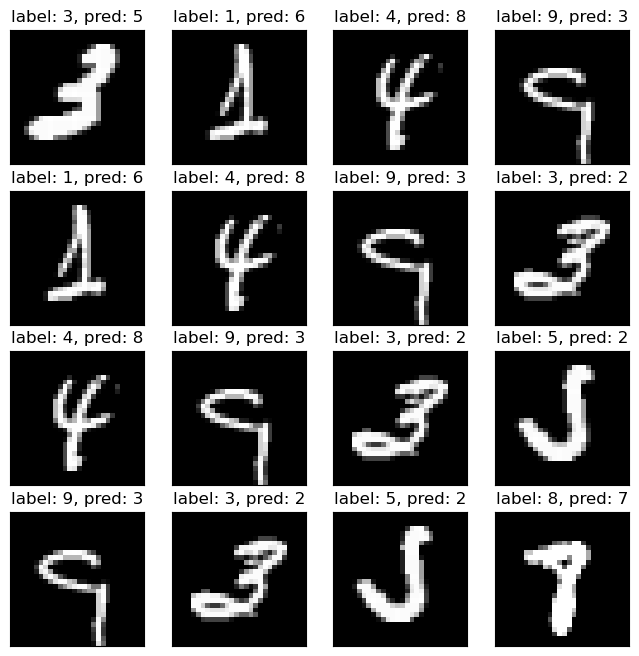

In [121]:
print("Incorretly predicted images")
fig, ax = plt.subplots(4,4, figsize = (8,8))
for i in range(4):
    for j in range(4):
        ax[i , j].imshow(x_val_incorrect[i*4 + j*4].reshape(28,28), cmap='gray')
        ax[i , j].set_title('label: %s, pred: %s' %(y_val_incorrect[i*4 + j*4], y_val_pred_incorrect[i*4 + j*4]))
        ax[i , j].set_xticks([])
        ax[i , j].set_yticks([])

In [123]:
x_test = pd.read_csv("C:\\Users\\panda\\Documents\\machine_learning\\test.csv")
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
preds = clf.predict(x_test)

C:\Users\panda\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

In [131]:
preds.shape

(28000,)

In [135]:
preds

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [137]:
sample_submission = pd.read_csv("C:\\Users\\panda\\Documents\\machine_learning\\sample_submission.csv")
sample_submission['Label'] = preds
sample_submission.to_csv('C:\\Users\\panda\\Documents\\machine_learning\\sample_submission.csv',index = False)